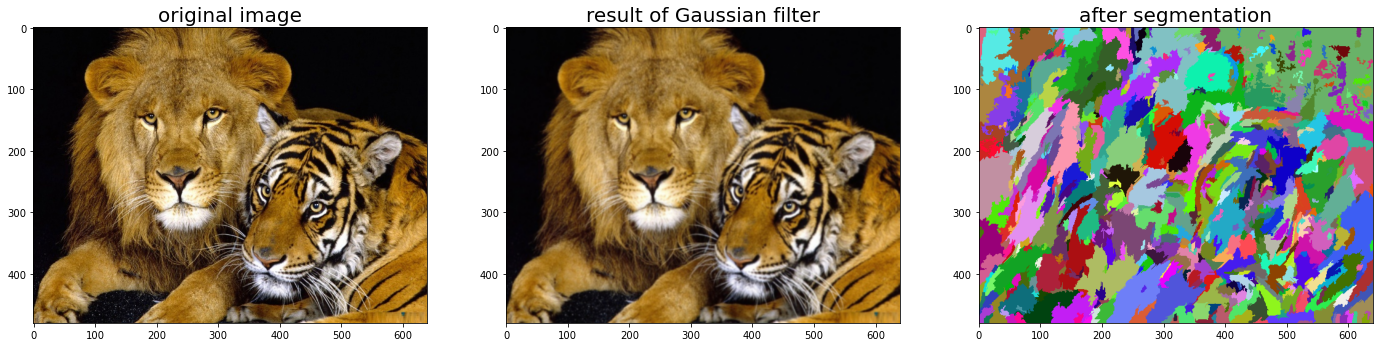

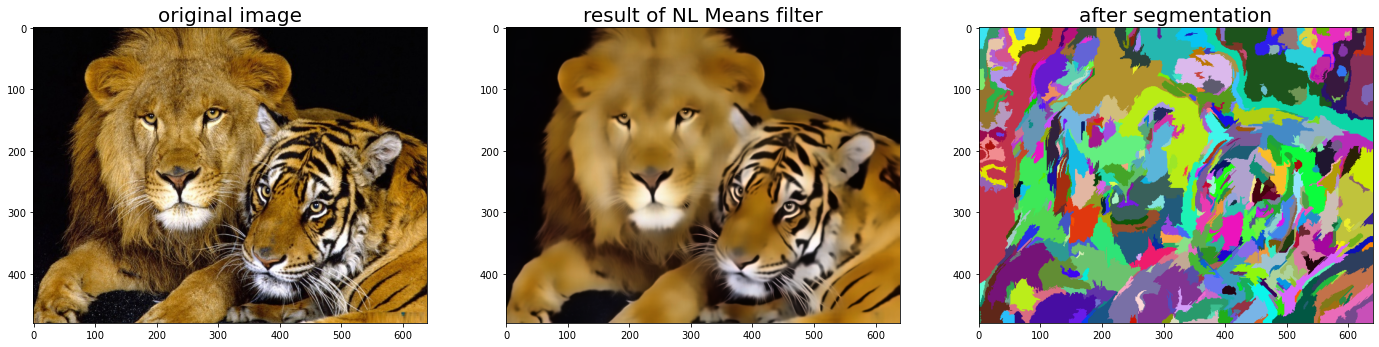

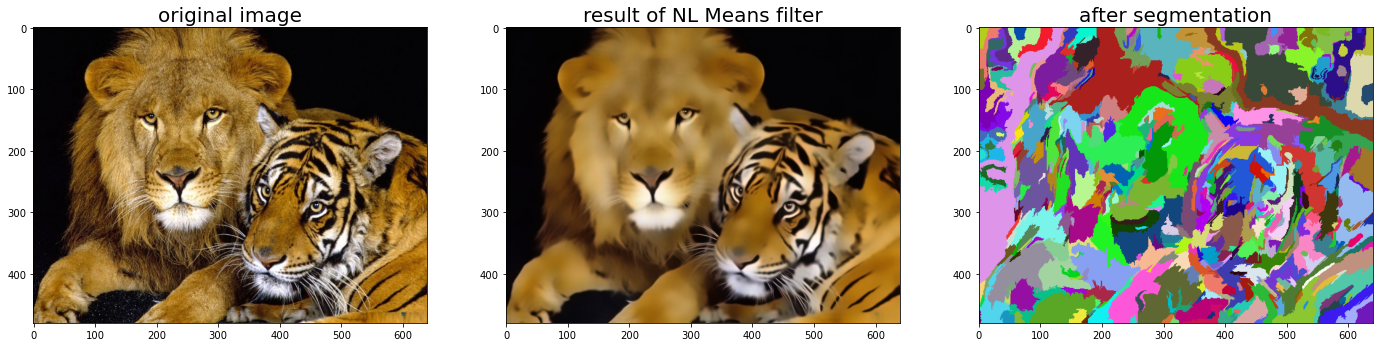

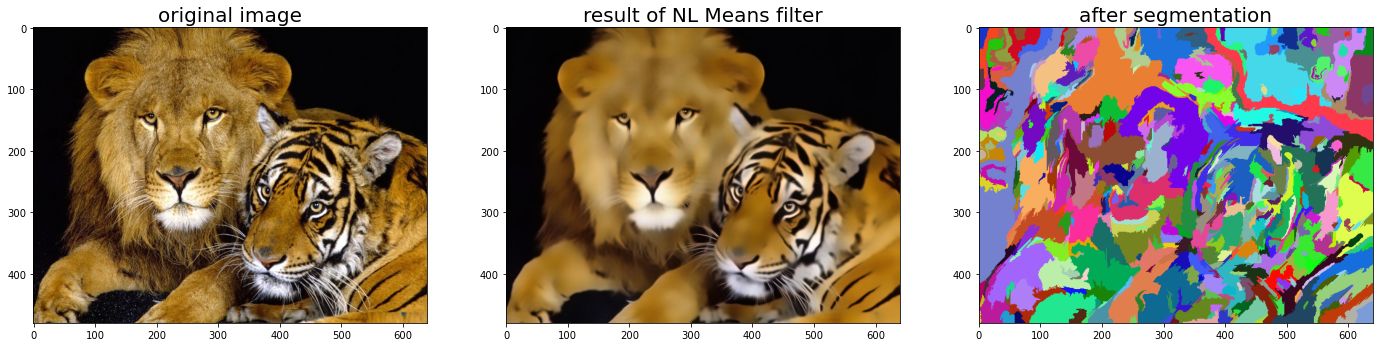

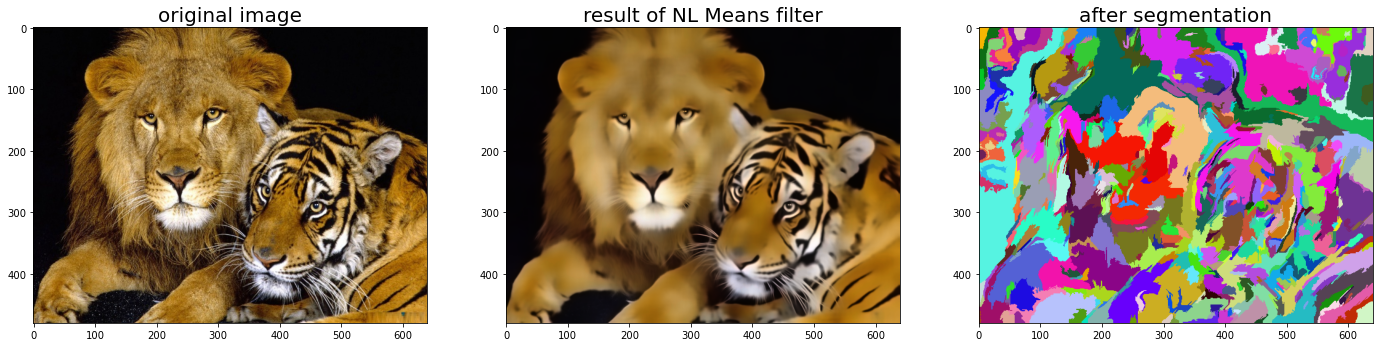

In [4]:
import sys
import cv2
import random as rand

import numpy as np

import GraphOperator as go

from matplotlib import pyplot as plt

def generate_image(ufset, width, height):
    random_color = lambda: (int(rand.random() * 255), int(rand.random() * 255), int(rand.random() * 255))
    color = [random_color() for i in range(width * height)]

    save_img = np.zeros((height, width, 3), np.uint8)

    for y in range(height):
        for x in range(width):
            color_idx = ufset.find(y * width + x)
            save_img[y, x] = color[color_idx]

    return save_img

def main(imgPath, filter=0 ,sigma = 0.9, k = 500, min_size = 50, h=10):
    sigma = sigma
    k = k
    min_size = min_size
    
    img = cv2.imread(imgPath)

    '''
    float_img = np.asarray(img, dtype=float)
    gaussian_img = cv2.GaussianBlur(float_img, (5, 5), sigma)
    b, g, r = cv2.split(gaussian_img)
    plt.imshow(gaussian_img)
    plt.show()
    '''
    '''
    #converted_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    nl_img = cv2.fastNlMeansDenoisingColored(img, None, 50,50,7,21)
    plt.imshow(cv2.cvtColor(nl_img,cv2.COLOR_BGR2RGB))
    print('after nl filtering')
    plt.show()
    '''


    fig, ax = plt.subplots(nrows= 1, ncols= 3, figsize=(24,10))
    ax[0].set_title('original image', fontsize = 20)
    ax[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

    ax[2].set_title('after segmentation', fontsize = 20)
    if filter is 0:
        ax[1].set_title('result of Gaussian filter', fontsize = 20)
        filteredImg = GaussianFiilter(img, sigma)
        ax[1].imshow(cv2.cvtColor(filteredImg,cv2.COLOR_BGR2RGB))
    elif filter is 1:
        ax[1].set_title('result of NL Means filter', fontsize = 20)
        filteredImg = NLMeansFilter(img, h=h)
        ax[1].imshow(cv2.cvtColor(filteredImg,cv2.COLOR_BGR2RGB))

    b, g, r = cv2.split(filteredImg)
    smooth_img = (r, g, b)

    height, width, channel = img.shape
    graph = go.build_graph(smooth_img, width, height)

    weight = lambda edge: edge[2]
    sorted_graph = sorted(graph, key=weight)

    ufset = go.segment_graph(sorted_graph, width * height, k)
    ufset = go.remove_small_component(ufset, sorted_graph, min_size)

    result_img = generate_image(ufset, width, height)
    ax[2].imshow(result_img)

def GaussianFiilter(img, sigma):
    #float_img = np.asarray(img, dtype=float)
    gaussian_img = cv2.GaussianBlur(img, (5, 5), sigma)
    return gaussian_img

def NLMeansFilter(img, h = 10):
    nl_img = cv2.fastNlMeansDenoisingColored(img, None, 30,30,7,21)
    return nl_img

if __name__ == '__main__':
    main(imgPath='../sampleImg/lion_tiger.jpg', filter=0)
    main(imgPath='../sampleImg/lion_tiger.jpg', filter=1, h=10)
    main(imgPath='../sampleImg/lion_tiger.jpg', filter=1, h=20)
    main(imgPath='../sampleImg/lion_tiger.jpg', filter=1, h=30)
    main(imgPath='../sampleImg/lion_tiger.jpg', filter=1, h=40)
